You want to isolate the foreground of an image

Mark a rectangle around the desired foreground, then run the GrabCut algorithm:



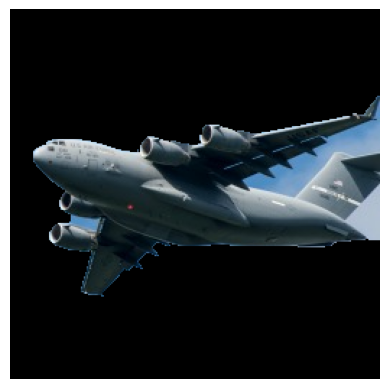

In [5]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image and convert to RGB
image_bgr = cv2.imread('../sim_data/images/plane_256x256.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)
# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# Run grabCut
cv2.grabCut(image_rgb, # Our image
mask, # The Mask
rectangle, # Our rectangle
bgdModel, # Temporary array for background
fgdModel, # Temporary array for background
5, # Number of iterations
cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle
# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

The first thing we notice is that even though GrabCut did a pretty good job, there
are still areas of background left in the image. We could go back and manually
mark those areas as background, but in the real world we have thousands of
images and manually fixing them individually is not feasible. Therefore, we
would do well by simply accepting that the image data will still contain some
background noise.
In our solution, we start out by marking a rectangle around the area that contains
the foreground. GrabCut assumes everything outside this rectangle to be
background and uses that information to figure out what is likely background
inside the square (to learn how the algorithm does this, check out the external
resources at the end of this solution). Then a mask is created that denotes the
different definitely/likely background/foreground regions:

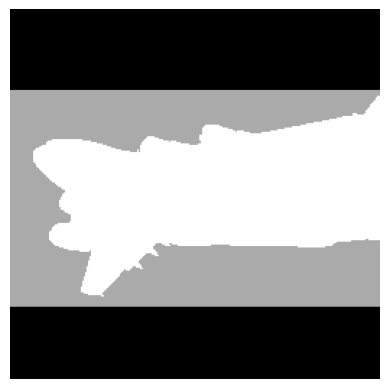

In [6]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

The black region is the area outside our rectangle that is assumed to be definitely
background. The gray area is what GrabCut considered likely background, while
the white area is likely foreground.
This mask is then used to create a second mask that merges the black and gray
regions:


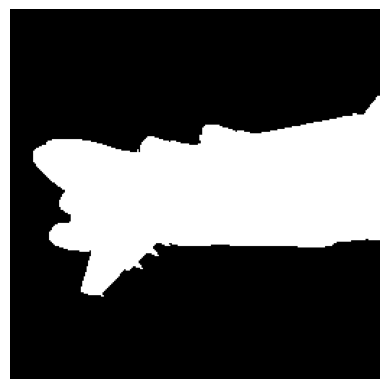

In [7]:
# Show mask
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

The second mask is then applied to the image so that only the foreground remains